Target:
    - Machine Learning non supérvisé
Algorithme
    - DBSCAN

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_colwidth',150)

In [91]:
df = pd.read_pickle('df_Abstract_Unsupervised.pkl')
df.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur  \
0          Roleder Tomasz   
1  Madgwick Sebastian O H   

                                                                                                                                              BagOfWords  
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...  
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...

In [92]:
df.shape

(391, 5)

In [63]:
# def matrix_of_word(df,col):
#     cv = CountVectorizer()
#     # On fit_transform 
#     cr_cv = cv.fit_transform(df[col])
#     cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
#     cr_dtm.index = df.index
#     return(cr_dtm)

In [93]:
import nltk
stop_uk = nltk.corpus.stopwords.words('english')
stop_uk.extend(['paper', 'none', 'image'])

In [94]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop_uk, ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [95]:
article_common_words = get_top_n_words(df.BagOfWords, 200)
keywords=[]
for word, freq in article_common_words:
    print(word, freq)
    keywords.append(word)

project management 99
project control 52
project performance 45
value management 44
process parameters 36
case study 35
cost schedule 31
maturity model 30
cash ﬂow 27
surface roughness 26
maturity models 26
project duration 25
construction projects 24
construction project 22
project cost 21
control system 20
schedule performance 20
software development 20
process control 19
management system 19
printing process 18
product quality 18
cost performance 18
management maturity 18
quality control 17
project managers 17
performance index 17
complexity management 17
manufacturing printing 16
cost time 16
life cycle 16
layer thickness 15
manufacturing processes 15
support vector 15
project selection 15
performance measurement 15
feedback control 14
point cloud 14
cash flow 14
performance project 14
control systems 13
surface quality 13
test parts 13
management information 13
schedule control 13
sensor data 12
development process 12
printer system 12
machine conditions 12
management evm 12
sched

### Créer le nuage de mots

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
def createWordCloud(text):
    wc = WordCloud(stopwords=stop_uk, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

    wc.generate(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.show()

There are 194422 words in the combination of all articles.


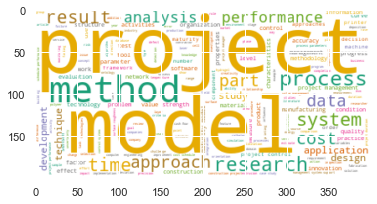

In [97]:
Allarticles= " ".join(words for words in df.BagOfWords)
print ("There are {} words in the combination of all articles.".format(len(Allarticles)))
createWordCloud(Allarticles)

### Créer la matrie des mots

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(vocabulary=keywords,analyzer='word', ngram_range=(2,2), min_df = 2, stop_words = stop_uk,use_idf=True)

In [100]:
# get matrix of tf-idf values
matrix=tfidf.fit_transform(df.BagOfWords)
matrix

<391x200 sparse matrix of type '<class 'numpy.float64'>'
	with 1463 stored elements in Compressed Sparse Row format>

In [101]:
# get features value
features = tfidf.get_feature_names()
TfIdf = pd.DataFrame(matrix.toarray(),columns=features)
#Xtrain_TfIdf = pd.DataFrame(matrix,columns=features)
TfIdf.index = df.index
TfIdf.head(5)

project management  project control  project performance  value management  \
0                 0.0              0.0                  0.0               0.0   
1                 0.0              0.0                  0.0               0.0   
2                 0.0              0.0                  0.0               0.0   
3                 0.0              0.0                  0.0               0.0   
4                 0.0              0.0                  0.0               0.0   

   process parameters  case study  cost schedule  maturity model  cash ﬂow  \
0                 0.0         0.0            0.0             0.0       0.0   
1                 0.0         0.0            0.0             0.0       0.0   
2                 0.0         0.0            0.0             0.0       0.0   
3                 0.0         0.0            0.0             0.0       0.0   
4                 0.0         0.0            0.0             0.0       0.0   

   surface roughness  ...  cost project  managers project  cash ﬂows  \
0                0.0  ...           0.0               0.0        0.0   
1                0.0  ...           0.0               0.0        0.0   
2                0.0  ...           0.0               0.0        0.0   
3                0.0  ...           0.0               0.0        0.0   
4                0.0  ...           0.0               0.0        0.0   

   execution phase  project schedule  research project  \
0              0.0               0.0               0.0   
1              0.0               0.0               0.0   
2              0.0               0.0               0.0   
3              0.0               0.0               0.0   
4              0.0               0.0               0.0   

   performance monitoring  project project  cloud models  prediction project  
0                     0.0              0.0           0.0                 0.0  
1                     0.0              0.0           0.0                 0.0  
2                     0.0              0.0           0.0                 0.0  
3                     0.0              0.0           0.0                 0.0  
4                     0.0              0.0           0.0                 0.0  

[5 rows x 200 columns]

### Standardiser les valeurs

In [108]:
# # On met dans train_num les variables numériques transformées en arrays
# tfIdf_num = df_tfIdf.iloc[:, range(5, len(df_tfIdf.columns))]
# # On change le format pour que scikitlearn tourne bien
tfIdf_numpy = TfIdf.to_numpy()
scaler=StandardScaler()
# On centre réduit
tfIdf_std = scaler.fit_transform(tfIdf_numpy)
tfIdf_std.shape

(391, 200)

In [109]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Création du modèle DBSCAN

In [112]:
for eps in range(20,0,-1):
    #eps = round(1/(21-x),3)
    model = DBSCAN(eps , min_samples = 2)
    model.fit(tfIdf_std)
    #Le matrice des clusters
    clusters = model.labels_
    #Le nombre de clusters
    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    # le nombre d'outliers
    n_noise_ = list(clusters).count(-1)
    print('La distance entre les mots est:' ,eps)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print('**************************************************')
    print('  ')

La distance entre les mots est: 20
Estimated number of clusters: 9
Estimated number of noise points: 10
**************************************************
  
La distance entre les mots est: 19
Estimated number of clusters: 14
Estimated number of noise points: 15
**************************************************
  
La distance entre les mots est: 18
Estimated number of clusters: 16
Estimated number of noise points: 29
**************************************************
  
La distance entre les mots est: 17
Estimated number of clusters: 24
Estimated number of noise points: 39
**************************************************
  
La distance entre les mots est: 16
Estimated number of clusters: 26
Estimated number of noise points: 59
**************************************************
  
La distance entre les mots est: 15
Estimated number of clusters: 31
Estimated number of noise points: 72
**************************************************
  
La distance entre les mots est: 14
Estimated nu

On remarque que tant la distance augmente le nombres de clusters ainsi que le nombre d'outliers augmante et inversement. Le but du brojet est d'affiner la recherche selon les mots clé donc il vaut mieux minimiser la distance pour se raprocher au mieux des recherche souhaitéesz

In [113]:
model = DBSCAN(eps = 20 , min_samples = 2)
model.fit(tfIdf_std)

DBSCAN(eps=20, min_samples=2)

In [114]:
#Avoir le nombre de clusters
classes = model.fit_predict(tfIdf_std)
print(np.unique(classes))

[-1  0  1  2  3  4  5  6  7  8]


In [115]:
#Les centres des clusters
cluster_centers = model.components_
cluster_centers

array([[-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156],
       [-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156],
       [-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156],
       ...,
       [-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156],
       [-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156],
       [-0.28944268, -0.22044682, -0.21858016, ..., -0.11690758,
        -0.05063697, -0.08793156]])

In [17]:
# pip install viscm: pour mettre à jour la palette de couleurs

### AgglomerativeClustering
`Il permet lafusion récurssive des pairs de clusters qui agmente au minimum la distance de liaison`

In [121]:
def hier(X, n_clusters):
    from sklearn.cluster import AgglomerativeClustering
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")


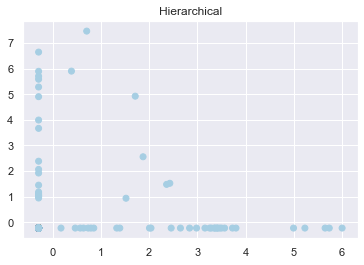

In [127]:
hier(tfIdf_numpy,9)

In [128]:
classes_df = pd.DataFrame(classes)
df_tfIdf['DBSCAN_cluster'] = classes
df_tfIdf

Titre  \
0                                                                    The basics of intravascular optical coherence tomography   
1                                               An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   
2                                         Laser-Machined Shape Memory Alloy Sensors for Position Feedback in Active Catheters   
3    Simultaneous tracking of catheters and guidewires: comparison to standard fluoroscopic guidance for arterial cannulation   
4                                                   Development of Active Catheter,Active Guide Wire and Micro Sensor Systems   
..                                                                                                                        ...   
221                                                             Information visualization for selection in Design by Shopping   
222                                   Le Tri Croisé de Monte Carlo : une boite à outils pour l'aide à la décision coopérative   
223                                               Models for Paired Comparison Data: A Review with Emphasis on Dependent Data   
224                                                                   Solar Irradiance Forecasting Using Deep Neural Networks   
225                                                         Detection of Circumstellar Material in a Normal Type Ia Supernova   

                                                                                                                                                    Resume  \
0    Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1    This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   
2    Catheter-based interventions are a form of minimally invasive surgery that can decrease hospitalization time and greatly lower patient morbidity c...   
3    OBJECTIVES: The purpose of this in vitro study was to clinically assess the feasibility of a three-dimensional (3D) electromagnetic (EM) navigator...   
4    Active catheters and active guide wires which move like a snake have been developed for catheter-based minimally invasive diagnosis and therapy. C...   
..                                                                                                                                                     ...   
221  In Design by Shopping, designers explore the design space to gain an insight into trades, and feasible and impractical solutions, as well as to le...   
222  Les méthodes de tri croisé sont des méthodes d'aide à la décision coopérative puisqu'elles permettent d'aboutir à une pondération de critères ou d...   
223  Thurstonian and Bradley–Terry models are the most commonly applied models in the analysis of paired comparison data. Since their introduction, num...   
224  Predicting solar irradiance has been an important topic in renewable energy generation. Prediction improves the planning and operation of photovol...   
225  Type Ia supernovae are important cosmological distance indicators. Each of these bright supernovae supposedly results from the thermonuclear explo...   

                                                                    URL  \
0                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                                             #item_204   
2                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2598764/   
3                                                             #item_226   
4                 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3627230/   
..                                                                  ...   
221                       https://hal.archives-ouvertes.fr/hal-01438790   
222                       https://hal.archives-ouvertes.fr/hal-00748747   

In [ ]:
df_tfIdf.to_csv('cluster_DBSCAN.csv')